# Experiments

In [9]:
result = {}

### Generate data

In [10]:
parameters_dict = {
    'num_nodes': 4,
    'num_graphs': 2,
    'products_count': 2,
    'num_depots': 1,
    'k_vehicles': 10,
    'compartment_capacity': 50,
    'planning_horizon': 7,
    'noise_demand': 0.2,
    'batch_size':2,
    'seed':6,
    'epochs':1,
    'max_trips':2,
    'eval_epochs':3
}

In [11]:
from PSRP.problem_solvers.gnn.graph_generation_functions import create_wheel_noised


dataset_dir='/content/drive/MyDrive/GraphDataset/wheel_10/'
generation_function=create_wheel_noised
node_dim = parameters_dict["products_count"]*3 + 2

synth_data = generation_function(parameters_dict['num_nodes'])

In [12]:
from PSRP.data_generators.DataBuilder_MPPSRP_Simple import DataBuilder_MPPSRP_Simple

data_builder = DataBuilder_MPPSRP_Simple(synth_data["weight_matrix"],
                                        distance_multiplier=1, travel_time_multiplier=60*60,
                                        planning_horizon=parameters_dict['planning_horizon'],
                                        safety_level=0.05, max_level=0.95,
                                        initial_inventory_level=0.5, tank_capacity=100,
                                        depot_service_time = 0*60, station_service_time=0*60,
                                        demand=10, products_count=parameters_dict['products_count'],
                                        k_vehicles=parameters_dict["k_vehicles"],
                                        compartments=[parameters_dict["products_count"] * [parameters_dict["compartment_capacity"]]],
                                        mean_vehicle_speed=60, vehicle_time_windows=[[9*60*60, 18*60*60]],
                                        noise_initial_inventory=0.0, noise_tank_capacity=0.1,
                                        noise_compartments=0.0, noise_demand=0.0,
                                        noise_vehicle_time_windows=0.0,
                                        noise_restrictions = 0.5,
                                        random_seed=45)

graph_data = data_builder.build_data_model()

In [13]:
from PSRP.problem_solvers.gnn.graph_generation_functions import create_wheel_noised


dataset_dir='/content/drive/MyDrive/GraphDataset/wheel_10/'
generation_function=create_wheel_noised
node_dim = data_builder.products_count * 3 + 2

In [14]:
from PSRP.problem_solvers.gnn.dataset_utils import GraphDataset
from torch.utils.data import DataLoader

dataset = GraphDataset(dataset_dir=dataset_dir,
        graph_data=graph_data,
        synth_data=synth_data,
        num_graphs=2,
        parameters_dict=parameters_dict)

train_dataloader = DataLoader(dataset, batch_size=parameters_dict['batch_size'], shuffle=True)

c:\Users\rkozl\Desktop\Sber\PSRP\problem_solvers\gnn\dataset_utils.py:78: RuntimeWarning: invalid value encountered in divide
  min_capacities = min_capacities / max_capacities
c:\Users\rkozl\Desktop\Sber\PSRP\problem_solvers\gnn\dataset_utils.py:79: RuntimeWarning: invalid value encountered in divide
  init_capacities = init_capacities / max_capacities
c:\Users\rkozl\Desktop\Sber\PSRP\problem_solvers\gnn\dataset_utils.py:80: RuntimeWarning: divide by zero encountered in divide
  vehicle_compartments = vehicle_compartments / max_capacities
c:\Users\rkozl\Desktop\Sber\PSRP\problem_solvers\gnn\dataset_utils.py:81: RuntimeWarning: invalid value encountered in divide
  node_demand = np.array(plan_horizon_prods) / max_capacities
c:\Users\rkozl\Desktop\Sber\PSRP\problem_solvers\gnn\dataset_utils.py:84: RuntimeWarning: divide by zero encountered in divide
  load = load / max_capacities
c:\Users\rkozl\Desktop\Sber\PSRP\problem_solvers\gnn\dataset_utils.py:85: RuntimeWarning: invalid value enco

In [15]:
from PSRP.problem_solvers.gnn.RL.agent import IRPAgent

agent_irp = IRPAgent(node_dim=node_dim, seed=parameters_dict['seed'])

In [16]:
import time
from PSRP.problem_solvers.gnn.RL.train import train

loss_history, dist_history, dry_runs_history, kpi = train(agent_irp,
            train_dataloader,
            parameters_dict,
            check_point_dir=f"./check_points/my_irp_{parameters_dict['num_nodes']}_{parameters_dict['seed']}/")

100%|██████████| 1/1 [00:17<00:00, 17.14s/it]


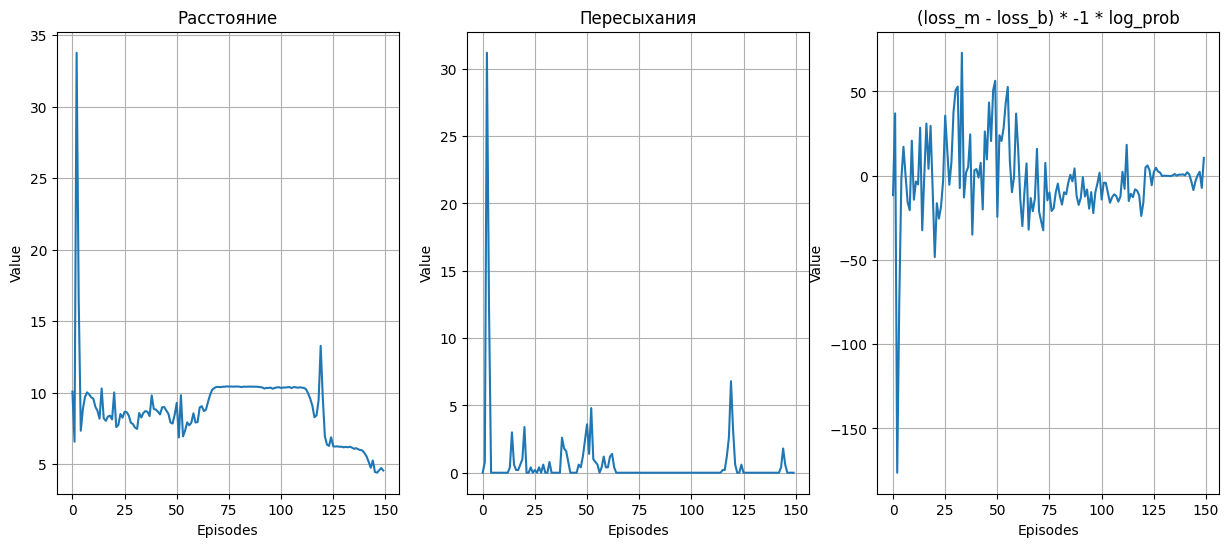

In [ ]:
import matplotlib.pyplot as plt

linspace = range(len(dist_history))

figure, axis = plt.subplots(1, 3, figsize=(15,6))

axis[0].plot(linspace, dist_history)
axis[0].set_title("Расстояние")
axis[0].grid()
axis[0].set_xlabel("Episodes")
axis[0].set_ylabel("Value")


axis[1].plot(linspace, dry_runs_history)
axis[1].set_title("Пересыхания")
axis[1].grid()
axis[1].set_xlabel("Episodes")
axis[1].set_ylabel("Value")

axis[2].plot(linspace, loss_history)
axis[2].set_title("(loss_m - loss_b) * -1 * log_prob")
axis[2].grid()
axis[2].set_xlabel("Episodes")
axis[2].set_ylabel("Value")

plt.show()

### Pred on CPSAT

In [ ]:
# num_nodes = 10
# synth_data = create_wheel_noised(num_nodes)
# data_nn, data_cpsat = get_graph_dict(synth_data,
#                                      num_nodes,
#                                      products_count,
#                                      compartment_capacity,
#                                      7,
#                                      k_vehicles=k_vehicles,
#                                      noise_demand=0.0,
#                                      draw=True)

data_nn = dataset[0]
data_cpsat = graph_data

In [ ]:
import torch.utils.data

positions,  weight_matrixes, daily_demands,\
        depots, remaining_time,\
        restriction_matrix, service_times,\
        min_capacities, max_capacities,\
        init_capacities, load = next(iter(train_dataloader))


In [ ]:
import numpy as np
vehicles = np.ones((10)) 
remaining_time[(vehicles - 1) % 10]
     

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=torch.float64)

In [24]:
from datetime import datetime
from pprint import pprint
import time

from PSRP.problem_solvers.mppsrp.cpsat.TaskBuilder_MPPSRP_FullMILP_CPSAT import TaskBuilder_MPPSRP_FullMILP_CPSAT
from PSRP.problem_solvers.mppsrp.cpsat.TaskSolver_MPPSRP_CPSAT import TaskSolver_MPPSRP_CPSAT
# from PSRP.problem_solvers.mppsrp.data_generators.DataBuilder_MPPSRP_FullMILP_CPSAT import DataBuilder_MPPSRP_FullMILP_CPSAT

from PSRP.paths_config import interim_dir

task_builder = TaskBuilder_MPPSRP_FullMILP_CPSAT( max_trips_per_day=parameters_dict['max_trips'], verbose=True )
task = task_builder.build_task( data_cpsat )

print("Solving start time: {}".format( datetime.now() ))
task_solver = TaskSolver_MPPSRP_CPSAT( cache_dir=interim_dir,
                                       cache_all_feasible_solutions=False,
                                       solution_prefix='dataset',
                                       time_limit_milliseconds=60_000)
start_time = time.time()
solution = task_solver.solve( task )
delta_time = time.time() - start_time
print('kpi')
kpi_dict = solution.get_kpis()
pprint( kpi_dict )

print()
routes_schedule = solution.get_routes_schedule()
pprint( routes_schedule )

print("done")

Variables count:
x: 2240
y: 140
z: 420
w: 560
u: 70
q: 2240
S: 560
I: 48
Total: 6278
Solving start time: 2024-07-01 12:49:40.781661
Status: INFEASIBLE
kpi


AttributeError: 'NoneType' object has no attribute 'get_kpis'

### Pred on model

In [11]:
import numpy as np


item = dataset[0]
new_item = []
for i in range(len(item)):
  new_item.append(np.expand_dims(item[i], axis=0))

In [12]:
import time
from copy import deepcopy

from PSRP.problem_solvers.gnn.RL.envipoment import IRPEnv_Custom

temp_data = deepcopy(new_item)

env_irp = IRPEnv_Custom(temp_data,
                        parameters_dict)

In [13]:
start_time = time.time()
loss_a, kpi = agent_irp.evaluate(env_irp)
delta_time_model = time.time() - start_time

print(loss_a)

tensor([-65.0296], device='cuda:0')


In [14]:
for e in zip(kpi['load_percents'], [e.item() for e in kpi['actions_list']]):
    print(e)

(array([[[0.49402314, 0.50336474]]], dtype=float32), 2)
(array([[[0.50592893, 0.49599987]]], dtype=float32), 0)
(array([[[0.5063076 , 0.49467653]]], dtype=float32), 0)
(array([[[0.5062745 , 0.49465683]]], dtype=float32), 0)
(array([[[0.5062745 , 0.49465683]]], dtype=float32), 0)
(array([[[0.501313 , 0.5127658]]], dtype=float32), 2)
(array([[[0.5060394 , 0.49632493]]], dtype=float32), 0)
(array([[[0.5063203, 0.494723 ]]], dtype=float32), 0)
(array([[[0.50631297, 0.4947185 ]]], dtype=float32), 0)
(array([[[0.50631297, 0.4947185 ]]], dtype=float32), 0)
(array([[[0.5013648 , 0.51281494]]], dtype=float32), 2)
(array([[[0.5060755 , 0.49639124]]], dtype=float32), 0)
(array([[[0.5063589 , 0.49478483]]], dtype=float32), 0)
(array([[[0.5063516 , 0.49478036]]], dtype=float32), 0)
(array([[[0.5063516 , 0.49478036]]], dtype=float32), 0)
(array([[[0.5014175 , 0.51286435]]], dtype=float32), 2)
(array([[[0.50611097, 0.4964577 ]]], dtype=float32), 0)
(array([[[0.5063983 , 0.49484706]]], dtype=float32),

In [15]:
actions = [e.item() for e in kpi['actions_list']]
m = data_cpsat['distance_matrix']
t = data_cpsat['travel_time_matrix']

time_delta = 18*60*60 - 9*60*60

sum_dist = 0
sum_time = 0
global_sum_time = 0
exceeded_time = 0
actions.insert(0,0)
print(actions)
for i in range(len(actions)-1):
  start = actions[i]
  end = actions[i+1]
  dist = m[start][end]
  edge_time = t[start][end]
  sum_time += edge_time
  global_sum_time += edge_time
  sum_dist += dist

  if end == 0 and sum_time > time_delta:
    # print(start, end)
    exceeded_time += 1
    sum_time = 0
  print(f'{start} -> {end} : dist = {dist} time = {edge_time}')

print()
print(f'sum_dist={sum_dist}, sum_time={global_sum_time}, exceeded_time = {exceeded_time}')

[0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0]
0 -> 2 : dist = 194 time = 11640
2 -> 0 : dist = 194 time = 11640
0 -> 0 : dist = 0 time = 0
0 -> 0 : dist = 0 time = 0
0 -> 0 : dist = 0 time = 0
0 -> 2 : dist = 194 time = 11640
2 -> 0 : dist = 194 time = 11640
0 -> 0 : dist = 0 time = 0
0 -> 0 : dist = 0 time = 0
0 -> 0 : dist = 0 time = 0
0 -> 2 : dist = 194 time = 11640
2 -> 0 : dist = 194 time = 11640
0 -> 0 : dist = 0 time = 0
0 -> 0 : dist = 0 time = 0
0 -> 0 : dist = 0 time = 0
0 -> 2 : dist = 194 time = 11640
2 -> 0 : dist = 194 time = 11640
0 -> 0 : dist = 0 time = 0
0 -> 0 : dist = 0 time = 0
0 -> 0 : dist = 0 time = 0
0 -> 2 : dist = 194 time = 11640
2 -> 0 : dist = 194 time = 11640
0 -> 0 : dist = 0 time = 0
0 -> 0 : dist = 0 time = 0
0 -> 0 : dist = 0 time = 0
0 -> 2 : dist = 194 time = 11640
2 -> 0 : dist = 194 time = 11640
0 -> 0 : dist = 0 time = 0
0 -> 0 : dist = 0 time = 0
0 -> 0 : dist = 0 time = 0
0 -> 2 : 

In [16]:
kpi['dry_runs']

defaultdict(int, {1: 0, 2: 0, 3: 0, 4: 0, 5: 2, 6: 2, 7: 2})

In [ ]:

from PSRP.problem_solvers.gnn.utils import divide_to_paths_nn


nn_paths = divide_to_paths_nn(actions)
lengths = []
for e in nn_paths:
  if not np.all(np.array(e) == 0):
    lengths.append(len(e))
np.array(lengths).mean()

kpi['mean_stops'] = np.array(lengths).mean()

actions_daily = kpi['actions_daily']
for key in actions_daily:
  actions_daily[key] =[e.item() for e in actions_daily[key]]

In [ ]:
import pandas as pd


result['wheel_10_3'] = {
        'sum_dist_cpsat':kpi_dict['total_travel_distance'],
        'sum_dist_model':sum_dist,
        'error': (kpi_dict['total_travel_distance'] - sum_dist) / kpi_dict['total_travel_distance'],
        'time_cpsat':delta_time,
        'time_model':delta_time_model,
        'dry_runs_model':sum(list(kpi['dry_runs'].values())),
        'dry_runs_cpsat':kpi_dict['dry_runs'],
    }
pd.DataFrame.from_dict(result, orient='index',).round(3)

In [ ]:
from PSRP.problem_solvers.gnn.utils import draw_paths


In [ ]:
from matplotlib import pyplot as plt
import networkx as nx

import matplotlib.colors as mcolors

def draw_paths(data_nn, routes):
  G = nx.Graph()
  edges = []
  for r in routes:
      route_edges = [(r[n],r[n+1]) for n in range(len(r)-1)]
      G.add_nodes_from(r)
      G.add_edges_from(route_edges)
      edges.append(route_edges)

  print("Graph has %d nodes with %d edges" %(G.number_of_nodes(),
  G.number_of_edges()))

  pos = data_nn[0]
  nx.draw_networkx_nodes(G,pos=pos)
  nx.draw_networkx_labels(G,pos=pos)
  colors = list(mcolors.TABLEAU_COLORS.keys())
  for ctr, edgelist in enumerate(edges):
      nx.draw_networkx_edges(G,pos=pos,edgelist=edgelist,edge_color = colors[ctr % len(colors)], width=5)
  plt.savefig('this.png')
  plt.show()
  
  
def divide_to_paths_nn(actions):

  particular_value = 0
  result = []
  temp_list = []
  for i in actions:
      if i == particular_value:
          temp_list.append(i)
          result.append(temp_list)
          temp_list.insert(0,0)
          temp_list = []
      else:
          temp_list.append(i)
  result.append(temp_list)
  result.pop(0)
  result.pop(-1)
  return result

def divide_to_path_cpsat(routes_schedule):
  result_paths = []
  for car in routes_schedule[0]:
    for e in car:
      result_paths.append(e[0])
  return result_paths

In [ ]:

nn_paths = divide_to_paths_nn(actions)
print(nn_paths)
draw_paths(data_nn, nn_paths)

In [ ]:

nn_paths = divide_to_paths_nn(actions_daily[1.0])
print(len(nn_paths))
draw_paths(data_nn, nn_paths)

In [ ]:
nn_paths = divide_to_paths_nn(actions_daily[3.0])
print(len(nn_paths))
draw_paths(data_nn, nn_paths)

In [ ]:
nn_paths = divide_to_paths_nn(actions_daily[4.0])
print(len(nn_paths))
draw_paths(data_nn, nn_paths)

In [ ]:


nn_paths = divide_to_paths_nn(actions_daily[5.0])
print(len(nn_paths))
draw_paths(data_nn, nn_paths)

In [ ]:
nn_paths = divide_to_paths_nn(actions_daily[6.0])
print(len(nn_paths))
draw_paths(data_nn, nn_paths)

In [ ]:
actions_daily

In [ ]:
nn_paths = divide_to_paths_nn(actions_daily[7.0])
print(len(nn_paths))
draw_paths(data_nn, nn_paths)

In [ ]:
from PSRP.problem_solvers.gnn.utils import divide_to_path_cpsat


cpsat_path = divide_to_path_cpsat(routes_schedule)
draw_paths(data_nn, cpsat_path)